In [1]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

from utils import draw3d
from idr import IDR

Fix some seed for reproducibility of results.

In [2]:
np.random.seed(42)

Make function that generates random data.

In [3]:
def generate_normal_clusters(dim=3, n_clusters=6, n_points=(40, 100)):
    points = []
    for cluster_i in range(n_clusters):
        n_cluster_points = np.random.randint(*n_points)
        points.append(np.random.normal(loc=np.random.randint(-100, 100, size=dim), 
                                          scale=np.random.randint(0, 20),
                                          size=(n_cluster_points, dim)
                                         ))
    return np.concatenate(points, axis=0)

In [4]:
data = generate_normal_clusters()

Let us look on our generated data.

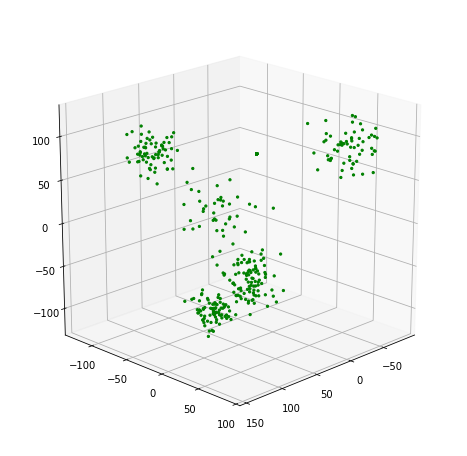

In [5]:
draw3d(data)

We need to know distances in high-dimensional space (in our simple case -- in 3-dimensional).

In [6]:
true_pairwise_distance = pairwise_distances(data)

Initialize and fit IDR instance.

In [7]:
idr = IDR(learning_rate=100, n_steps=100, random_state=42, show_progress_bar=True)
idr.fit(true_pairwise_distance)

progress: 100/100. losses: mse=448.3175; mae=14.0531.                  

Now we can draw the resulting embedding.

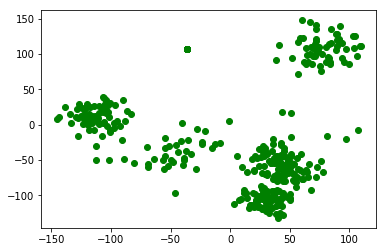

In [8]:
idr.draw_points()

Looks similar, isn't it?